In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
corpus = pd.read_csv("../0.data/Restaurant_Reviews.tsv", delimiter="\t", quoting=3) # quoting: ignorar comillas dobles
corpus.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
corpus.shape

(1000, 2)

In [4]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Limpieza de texto

In [5]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Eliminar signos de puntuacion(conservar solo caracteres A-Z)
review = re.sub("[^a-zA-Z]", " ",corpus["Review"][0]) # sustituir cualquier caracter que no sea [^a-zA-Z]
# Pasar a minuscula todas las palabras
review = review.lower()
# tokenizacion
review = review.split()

#forma 1
# eliminar stopwords y aplicarle lematizacion a cada palabra
#lemmatizer = WordNetLemmatizer()
#review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]

# forma 2 usando stemming: obteniendo la raiz de la palabra 
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]

# unir todas las palabras o tokens
review = " ".join(review)


In [7]:
def text_cleaning(corpus, column_name):
    for i in range(len(corpus[f"{column_name}"])):
        # Eliminar signos de puntuacion(conservar solo caracteres A-Z)
        text = re.sub("[^a-zA-Z]", " ",corpus[f"{column_name}"][i]) # sustituir cualquier caracter que no sea [^a-zA-Z]
        # Pasar a minuscula todas las palabras
        text = text.lower()
        # tokenizacion
        text = text.split()

        #forma 1
        # eliminar stopwords y aplicarle lematizacion a cada palabra
        lemmatizer = WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words("english"))]

        # forma 2 usando stemming: obteniendo la raiz de la palabra 
        #ps = PorterStemmer()
        #text = [ps.stem(word) for word in text if not word in set(stopwords.words("english"))]

        # unir todas las palabras o tokens
        text = " ".join(text)
        # actualizar el corpus -> usando at
        corpus.at[i,"Review"] = text
        # actualizar el corpus -> usando loc
        #corpus.at[i,"Review"] = text
    return corpus

In [ ]:
Corpus_clean = text_cleaning(corpus,"Review")

In [11]:
Corpus_clean.head(10)

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1
5,getting angry want damn pho,0
6,honeslty taste fresh,0
7,potato like rubber could tell made ahead time ...,0
8,fry great,1
9,great touch,1


In [46]:
# crear el Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1000) # 1500 palabras mas frecuentes 
# Crear la matriz sparse
X = cv.fit_transform(Corpus_clean["Review"]).toarray()
y = Corpus_clean["Liked"]

In [32]:
X.shape

(1000, 1200)

In [47]:
# Separar los datos
# =========== SEPARACION DE DATOS =========== 
from sklearn.model_selection import train_test_split

# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [56]:
# =========== MODELADO =========== KNN
from sklearn.neighbors import KNeighborsClassifier
# crear el modelo
model_classifier = KNeighborsClassifier(n_neighbors=9, metric="minkowski", p = 2)
# entrenar el modelo
model_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [57]:
# ============= PREDECIR =============
y_pred = model_classifier.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

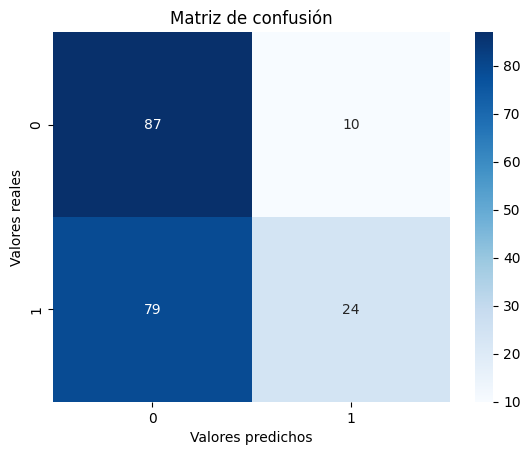

In [58]:
# ============== MATRIZ DE CONFUSION =================================
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor con Seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Ajustar las etiquetas del eje x y el título
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.title("Matriz de confusión")

# Mostrar el gráfico
plt.show()


In [59]:
# =========== METRICAS DE EVALUACION ========= 
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.52      0.90      0.66        97
           1       0.71      0.23      0.35       103

    accuracy                           0.56       200
   macro avg       0.61      0.56      0.51       200
weighted avg       0.62      0.56      0.50       200



In [75]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del clasificador de Random Forest
model_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Entrenar el clasificador
model_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_classifier.predict(X_test)

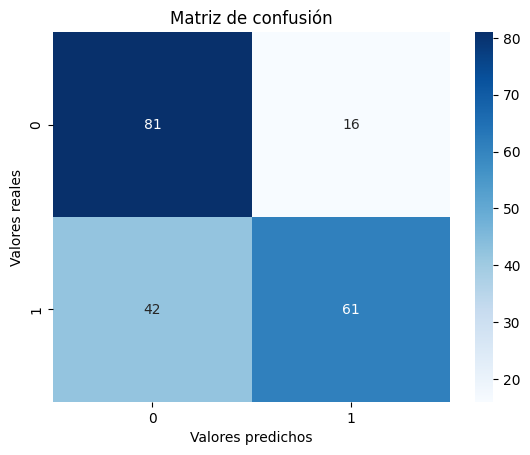

In [76]:
# ============== MATRIZ DE CONFUSION =================================
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor con Seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Ajustar las etiquetas del eje x y el título
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.title("Matriz de confusión")

# Mostrar el gráfico
plt.show()


In [77]:
# =========== METRICAS DE EVALUACION ========= 
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74        97
           1       0.79      0.59      0.68       103

    accuracy                           0.71       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.71      0.71       200



In [69]:
from sklearn.naive_bayes import GaussianNB

# Crear una instancia del clasificador de Random Forest
model_classifier = GaussianNB()

# Entrenar el clasificador
model_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_classifier.predict(X_test)

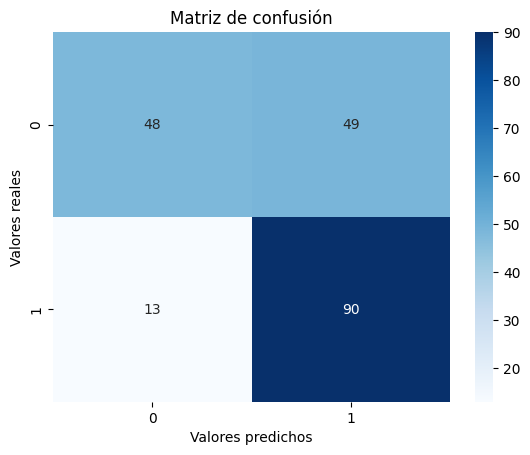

In [70]:
# ============== MATRIZ DE CONFUSION =================================
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor con Seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Ajustar las etiquetas del eje x y el título
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.title("Matriz de confusión")

# Mostrar el gráfico
plt.show()


In [71]:
# =========== METRICAS DE EVALUACION ========= 
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.79      0.49      0.61        97
           1       0.65      0.87      0.74       103

    accuracy                           0.69       200
   macro avg       0.72      0.68      0.68       200
weighted avg       0.72      0.69      0.68       200

